## Локальный и глобальный поиск

Решите задачу коммивояжера на основе файла данных `hw9_data/tsp.csv`: найти минимальный НЕЦИКЛИЧЕСКИЙ путь (начинается и заканчивается в разных точках), соединяющий N точек. Файл содержит координаты каждого из городов на плоскости. Используйте L1 расстояние для расчетов и визуализации.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random 
from copy import copy
from tqdm import tqdm

In [2]:
df = pd.read_csv('tsp.csv', names=['x', 'y'])
data = np.array(df)
n = data.shape[0]

In [3]:
def L1(p_1, p_2):
    return np.sum(np.abs(p_1-p_2))

def score(data_ind):
    s = 0
    
    for i in range(1, n):
        s += L1(data[data_ind[i-1]], data[data_ind[i]])
    
    return s

### Задание 1 (1 балл) 

Реализуйте Монте-Карло поиск.

best score =  26280


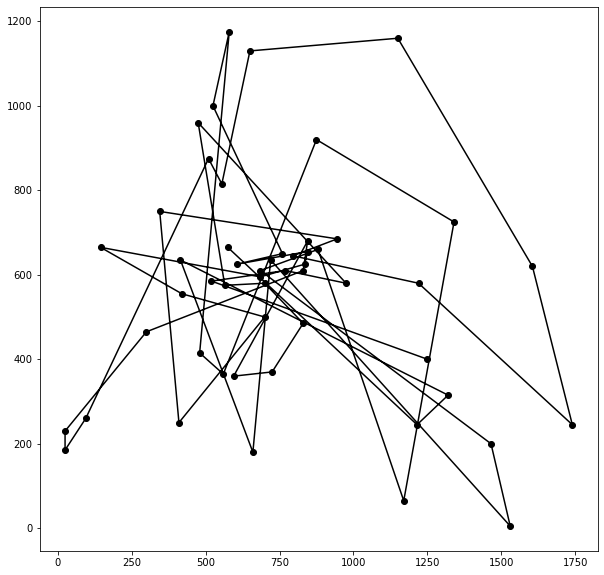

In [4]:
it = 50000 # set
score_route = []
for _ in range(it):
    data_ind = np.random.permutation(n)
    score_route.append([score(data_ind), data_ind])
best_score, best_route = min(score_route)
print('best score = ', best_score)
plt.figure(figsize=(10, 10))
plt.plot(data[best_route][:,0], data[best_route][:,1], 'ko-')
plt.show()

### Задание 2 (1 балл) 

Реализуйте поиск случайным блужданием.

<ipython-input-5-ec95d663573b>:8: RuntimeWarning: divide by zero encountered in longlong_scalars
  w = [1/L1(data[route[-1]], data[x]) for x in data_ind]


best score =  20360


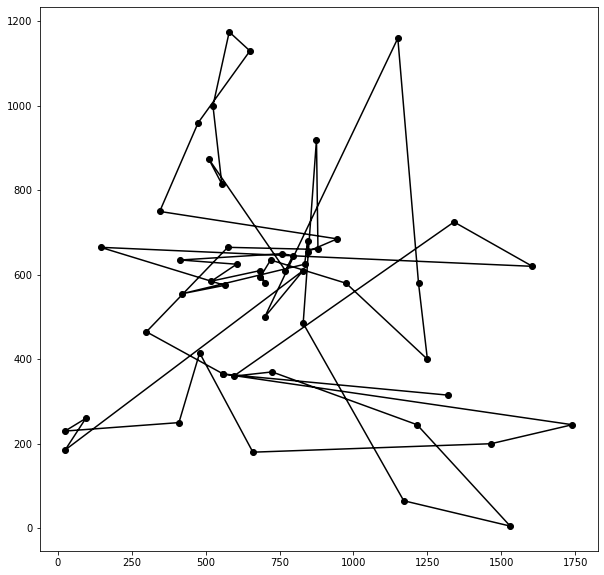

In [5]:
it = 1000 # Set
score_route = []
for _ in range(it):
    data_ind = [i for i in range(n)]
    route = []
    route.append(random.choice(data_ind))
    while len(data_ind) > 0:
        w = [1/L1(data[route[-1]], data[x]) for x in data_ind]
        route.append(random.choices(data_ind, w)[0])
        data_ind.remove(route[-1])
    s = score(route)
    score_route.append([s, route])
best_score, best_route = min(score_route)
print('best score = ', best_score)
plt.figure(figsize=(10, 10))
plt.plot(data[best_route][:,0], data[best_route][:,1], 'ko-')
plt.show()

### Задание 3 (2 балла) 

Реализуйте Hill Climb.

In [4]:
def slight_change(data_ind):
    for _ in range(100):
        route = copy(data_ind)
        s = score(route)
        nb_1, nb_2 = np.random.randint(0, n), np.random.randint(0, n)
        route[nb_1] = data_ind[nb_2]
        route[nb_2] = data_ind[nb_1]
        tmp_s = score(route)
        if tmp_s < s:
            if 'best_s' in locals() and tmp_s < best_s:
                best_s = tmp_s
                best_route = route
            else:    
                best_s = tmp_s
                best_route = route
    if 'best_route' not in locals():
        best_route = route
    return best_route

100%|██████████████████████████████████████████████████████████████████████████████████| 20/20 [02:06<00:00,  6.34s/it]

best score =  13005


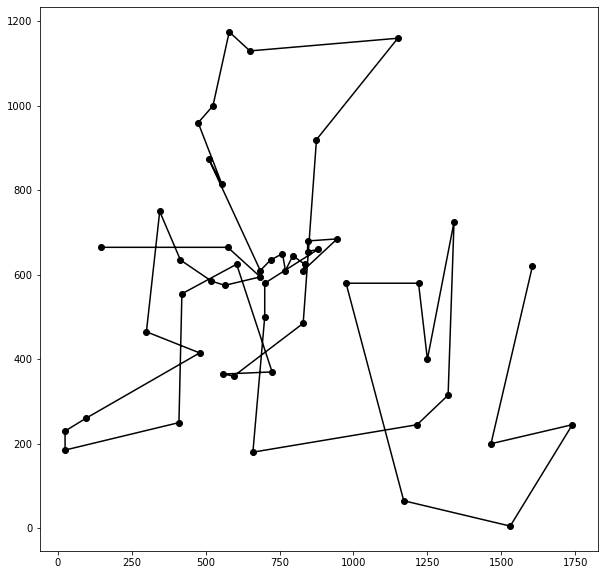

In [66]:
it_1, it_2 = 20, 1000
score_route = []
for _ in tqdm(range(it_1)):
    route = np.random.permutation(n)
    s = score(route)
    for _ in range(it_2):
        tmp_route = slight_change(route)
        tmp_s = score(tmp_route)
        if tmp_s < s:
            s = tmp_s
            route = tmp_route
        else:
            break
    score_route.append([s, route])
best_score, best_route = min(score_route)
print('best score = ', best_score)
plt.figure(figsize=(10, 10))
plt.plot(data[best_route][:,0], data[best_route][:,1], 'ko-')
plt.show()      

### Задание 4 (3 балла) 


Реализуйте отжиг (simulated annealing). Температурный режим отжига выберите самостоятельно.

 17%|█████████████▌                                                                  | 170/999 [00:15<01:12, 11.43it/s]<ipython-input-6-cc347cd52fd6>:10: RuntimeWarning: overflow encountered in true_divide
  if tmp_s < s or random.uniform(0, 1) < np.exp(-(tmp_s-s)/T):
 18%|██████████████▎                                                                 | 178/999 [00:15<01:11, 11.46it/s]<ipython-input-6-cc347cd52fd6>:10: RuntimeWarning: divide by zero encountered in true_divide
  if tmp_s < s or random.uniform(0, 1) < np.exp(-(tmp_s-s)/T):
 24%|███████████████████▌                                                            | 244/999 [00:21<01:07, 11.23it/s]<ipython-input-6-cc347cd52fd6>:10: RuntimeWarning: invalid value encountered in true_divide
  if tmp_s < s or random.uniform(0, 1) < np.exp(-(tmp_s-s)/T):
100%|████████████████████████████████████████████████████████████████████████████████| 999/999 [01:27<00:00, 11.37it/s]


best score =  12230


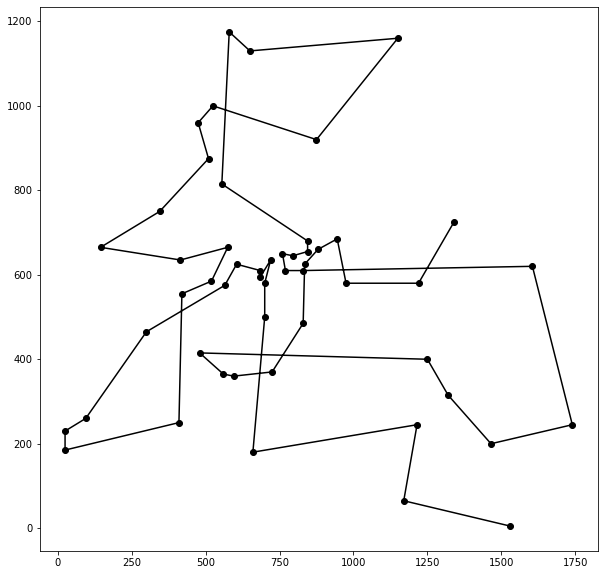

In [6]:
T = 1000
it = 1000
route = np.random.permutation(n)
s = score(route)
best_route, best_score = copy(route), s
for i in tqdm(range(1, it)):
    tmp_route = slight_change(route)
    tmp_s = score(tmp_route)
    T *= (1/i)
    if tmp_s < s or random.uniform(0, 1) < np.exp(-(tmp_s-s)/T):
        route, s = copy(tmp_route), tmp_s
        if best_score > s:
            best_route, best_score = copy(route), s
print('best score = ', best_score)
plt.figure(figsize=(10, 10))
plt.plot(data[best_route][:,0], data[best_route][:,1], 'ko-')
plt.show()      

### Задание 5 (3 балла) 

Реализуйте генетический алгоритм.

In [4]:
def L1_pair(data):
    d = {}
    for i in range(data.shape[0]):
        for j in range(data.shape[0]):
            if i == j:
                continue
            else:
                d[(i, j)] = L1(data[i], data[j])
    return d

In [5]:
pair_d = L1_pair(data)

In [6]:
def crossover(x, y):
    start, stop = sorted(random.sample(range(1, n), 2))
    cut_x, cut_y = x[start:stop], y[start:stop]
    new_x, new_y = np.concatenate((x[:start], cut_y, x[stop:])), np.concatenate((y[:start], cut_x, y[stop:]))
    add_new_x, add_new_y = [i for i in range(n) if i not in new_x], [j for j in range(n) if j not in new_y]
    for i in range(n):
        if i < start:
            if new_x[i] in new_x[start:stop]:
                if i == 0:
                    new_x[i] = random.choice(add_new_x)
                    add_new_x.remove(new_x[i])
                else:
                    tmp = sorted([pair_d[(new_x[i-1], x)], x] for x in range(n) if x != new_x[i-1])
                    for p in tmp:
                        if p[1] in add_new_x:
                            new_x[i] = p[1]
                            add_new_x.remove(new_x[i])
                            break
        elif start <= i < stop:
            continue
        elif i >= stop:
             if new_x[i] in new_x[start:stop]:
                    tmp = sorted([pair_d[(new_x[i-1], x)], x] for x in range(n) if x != new_x[i-1])
                    for p in tmp:
                        if p[1] in add_new_x:
                            new_x[i] = p[1]
                            add_new_x.remove(new_x[i])
                            break
    
    for i in range(n):
        if i < start:
            if new_y[i] in new_y[start:stop]:
                if i == 0:
                    new_y[i] = random.choice(add_new_y)
                    add_new_y.remove(new_y[i])
                else:
                    tmp = sorted([pair_d[(new_y[i-1], y)], y] for y in range(n) if y != new_y[i-1])
                    for p in tmp:
                        if p[1] in add_new_y:
                            new_y[i] = p[1]
                            add_new_y.remove(new_y[i])
                            break
        elif start <= i < stop:
            continue
        elif i >= stop:
             if new_y[i] in new_y[start:stop]:
                    tmp = sorted([pair_d[(new_y[i-1], y)], y] for y in range(n) if y != new_y[i-1])
                    for p in tmp:
                        if p[1] in add_new_y:
                            new_y[i] = p[1]
                            add_new_y.remove(new_y[i])
                            break
                            
    return new_x, new_y


def mutation(route, pr):
    new_route = copy(route)
    if random.uniform(0, 1) < pr:
        mut = random.randint(0, n-1)
        new_route[mut-1] = route[mut]
        new_route[mut] = route[mut-1]
    return new_route

In [9]:
pop_size = 1000
gen_size = 1000
pr_mut = 0.1
pop = []

for _ in range(pop_size):
    route = np.random.permutation(n)
    s = score(route)
    pop.append([s, route])

for _ in tqdm(range(gen_size)):
    fit = [1/p[0] for p in pop]
    summ = sum(fit)
    pr_pop = [p/summ for p in fit]
    ancs = np.random.choice(range(pop_size), size=pop_size//2, replace=False, p=pr_pop)
    for i, j in zip(range(0, len(ancs), 2), range(1, len(ancs), 2)):
        cross_route_1, cross_route_2 = crossover(pop[ancs[i]][1], pop[ancs[j]][1])
        cross_route_1, cross_route_2 = mutation(cross_route_1, pr_mut), mutation(cross_route_2, pr_mut)
        s_1, s_2 = score(cross_route_1), score(cross_route_2)
        pop.append([s_1, cross_route_1])
        pop.append([s_2, cross_route_2])
    pop = sorted(pop, key=lambda p: p[0])[:pop_size]
    
best_score, best_route = min(pop, key=lambda p: p[0])

100%|██████████████████████████████████████████████████████████████████████████████| 1000/1000 [06:52<00:00,  2.42it/s]


best score =  10915


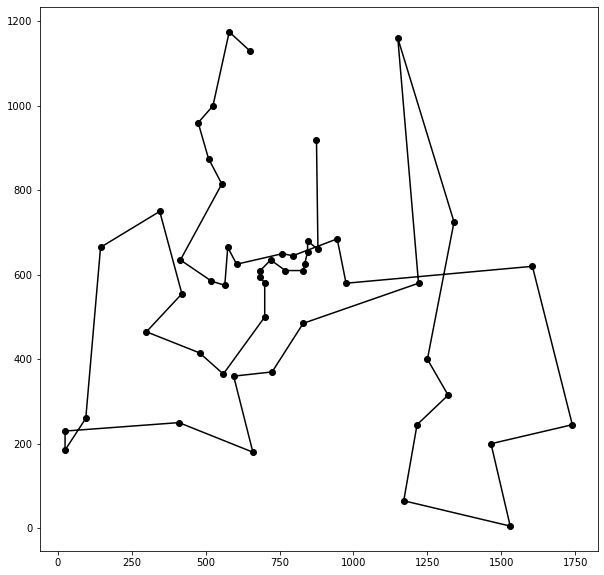

In [10]:
print('best score = ', best_score)
plt.figure(figsize=(10, 10))
plt.plot(data[best_route][:,0], data[best_route][:,1], 'ko-')
plt.show()   